Install LaTex

- ```sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super```
- https://github.com/garrettj403/SciencePlots/wiki/FAQ#installing-latex

function copy from 
- https://jwalton.info/Embed-Publication-Matplotlib-Latex/

In [1]:
# https://jwalton.info/Embed-Publication-Matplotlib-Latex/
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predefined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = (fig_width_pt * inches_per_pt) * subplots[1]
    # Figure height in inches
    # print(fig_width_in,subplots)
    fig_height_in = (fig_width_in * golden_ratio * (subplots[0] / subplots[1]))
    # print(fig_height_in,subplots, subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [6]:
import matplotlib.pyplot as plt
width = 345
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)

"""A simple example of creating a figure with text rendered in LaTeX."""

import numpy as np
x = np.linspace(0, 2*np.pi, 100)

Demo

Text(0, 0.5, '$\\sin (\\theta)$')

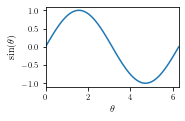

In [7]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width, fraction=0.5))
ax.plot(x, np.sin(x))
ax.set_xlim(0, 2 * np.pi)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\sin (\theta)$')

Text(0, 0.5, '$\\sin (\\theta)$')

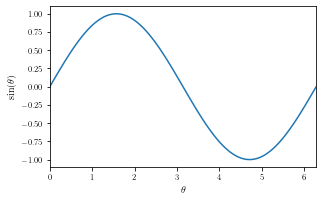

In [8]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width, fraction=1))
ax.plot(x, np.sin(x))
ax.set_xlim(0, 2 * np.pi)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\sin (\theta)$')

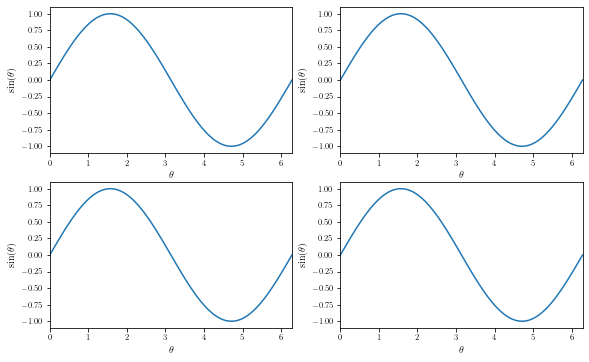

In [9]:
# Initialise figure instance
row, col = 2,2
fig, ax = plt.subplots(nrows=row, ncols=col, figsize=set_size(width, subplots=(row,col)))
# Plot
for i in range(row):
    for j in range(col):
        ax[i][j].plot(x, np.sin(x))
        ax[i][j].set_xlim(0, 2 * np.pi)
        ax[i][j].set_xlabel(r'$\theta$')
        ax[i][j].set_ylabel(r'$\sin (\theta)$')

## 10-CV graph

In [68]:
targets = ['ensemble','ada','boost','lda','lr','rf']
ranks = dict()
for target in targets:
    if(target not in ranks):
        ranks[target] = dict()
    f = open(f"rank_{target}.txt",'r')
    for line in f.readlines():
        model, acc, cv_mean, cv_std = line.rstrip('\n').split(' ')
        model = model.rstrip(':')
        # print(model)
        if(model not in ranks[target]):
            ranks[target][model] = dict({
                'acc': [],
                'cv_mean':[],
                'cv_std': []
            })
        ranks[target][model]['acc'].append(float(acc))
        ranks[target][model]['cv_mean'].append(float(cv_mean))
        ranks[target][model]['cv_std'].append(float(cv_std))
    f.close()


In [100]:
models = list(ranks['ensemble'].keys())
print(models)

['SVM', 'LR', 'Boost', 'Ada', 'RF', 'LDA']


SVM


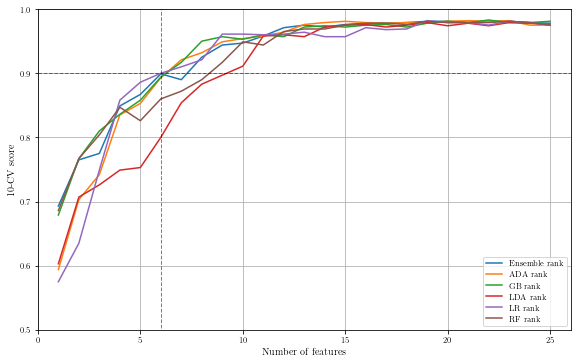

LR


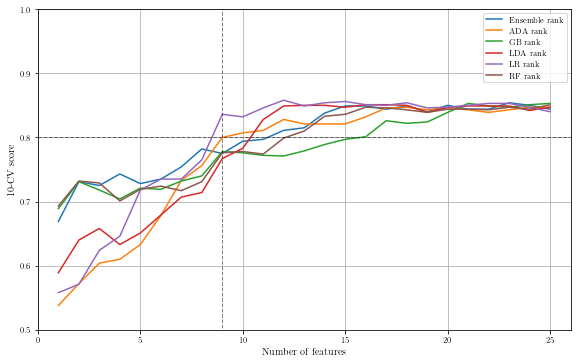

Boost


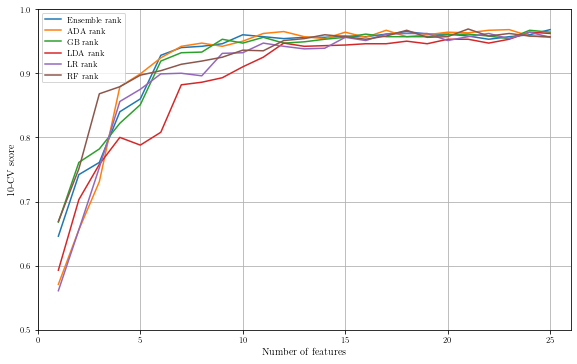

Ada


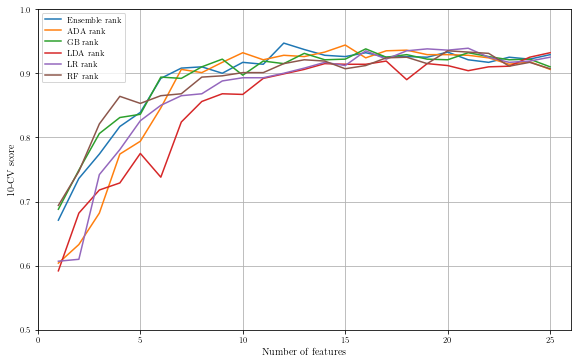

RF


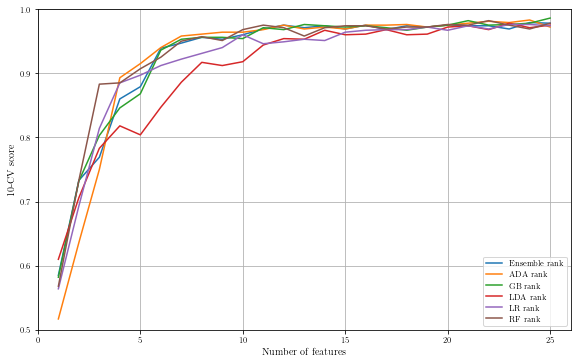

LDA


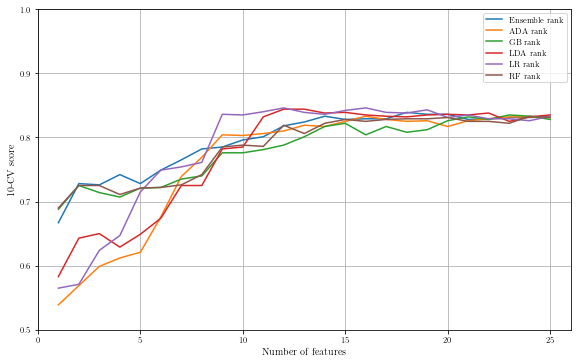

In [113]:
for model in models:
    row, col = 1,1
    fig, ax = plt.subplots(nrows=row, ncols=col, figsize=set_size(width,fraction=2, subplots=(row,col)))
    print(model)
    for target in targets:
        values = ranks[target][model]['cv_mean']
        label = None
        if(target == 'ensemble'): label = target.capitalize()
        elif(target == 'boost'): label = 'GB'
        else: label = target.upper()
        ax.plot(range(1,25+1), values, label=f'{label} rank')
    if(model=='SVM'):
        ax.plot([0,26], [0.9,0.9], linestyle='dashed',c='black', alpha=0.5, linewidth=1)
        ax.plot([6,6], [0,1], linestyle='dashed',c='black', alpha=0.5, linewidth=1)
    elif(model=='LR'):
        ax.plot([0,26], [0.8,0.8], linestyle='dashed',c='black', alpha=0.5, linewidth=1)
        ax.plot([9,9], [0,1], linestyle='dashed',c='black', alpha=0.5, linewidth=1)
    ax.set_xlim(0, 25+1)
    ax.set_ylim(0.5, 1)
    ax.set_xlabel(r'Number of features')
    ax.set_ylabel(r'10-CV score')
    ax.legend()
    ax.grid()
    plt.show()


In [ ]:
row, col = 1,1
fig, ax = plt.subplots(nrows=row, ncols=col, figsize=set_size(width,fraction=2, subplots=(row,col)))
for target in targets:
    svm = ranks[target]['SVM']['cv_mean']
    if(target == 'ensemble'): target = target.capitalize()
    elif(target == 'boost'): target = 'GB'
    else: target = target.upper()
    ax.plot(range(1,25+1), svm, label=f'{target}')
ax.plot(range(0,25+1), [0.9]*26, linestyle='dashed',c='black', alpha=0.5, linewidth=1)
ax.set_xlim(0, 25+1)
ax.set_ylim(0.5, 1)
ax.set_xlabel(r'Number of features')
ax.set_ylabel(r'10-CV score')
ax.legend()
ax.grid()

print('SVM')
plt.show()
